___
# Atividade: Análise Exploratória - Variáveis Qualitativas
___

## Aula 02


<div id="indice"></div>

## Índice

- [Empresa de TV](#empresa-de-tv)

- [Tipos de variáveis](#tipos-de-variaveis)
    - [Exercício 1](#ex1)
    
    
- [Definindo as variáveis qualitativas nas colunas do *dataframe* ](#definindo)
    - [Modificando o tipo de uma coluna para variável qualitativa](#astype)
    - [Modificando os rótulos de uma variável qualitativa](#categories)
    - [Modificando uma variável qualitativa do tipo Nominal para Ordinal](#nominalparaordinal)


- [Análise Exploratória Univariada - Tabelas de frequências](#value_counts)
    - [Exercício 2](#ex2)
    - [Exercício 3](#ex3)


- [Análise Exploratória Bivariada - Tabelas cruzadas de frequências](#crosstab)
    - [Exercício 4](#ex4)
    - [Exercício 5](#ex5)


- [Análise Exploratória - Gráficos](#barplot)
    - [Exercício 6](#ex6)
    - [Exercício 7](#ex7)
        

___
<div id="empresa-de-tv"></div>

# Empresa de TV

<img src="empresaTV.jpg" height="400">

Fonte: extraído da internet

Uma empresa de TV via satélite criou recentemente dois tipos de planos de canais (A e B).

A empresa tem como objetivo estudar o perfil dos clientes que aderiram ao plano para enviar malas diretas aos potenciais clientes de cada tipo de plano.

A base de dados apresenta algumas variáveis para uma amostra de 82 clientes selecionados aleatoriamente dentre aqueles que aderiram aos planos. As variáveis têm os seguintes significados:

* CLIENTE: identificador do cliente.
* PLANO: apresenta o plano adquirido pelo cliente – (1=A ou 2=B). 
* EC: apresenta estado civil do cliente no momento da adesão ao  plano – (1=Casado, 2=Solteiro e 3=Outros).
* SATISFACAO: grau de satisfação do cliente pelo plano – 
	(Muito insatisfeito, Insatisfeito, Indiferente, Satisfeito e Muito satisfeito).
* RENDA: renda pessoal do cliente, em milhares de reais.

O arquivo `EmpresaTV_Cod.xlsx` contém as variáveis descritas acima.

<div id="tipos-de-variaveis"></div>

# Tipos de variáveis

Antes de olhar os dados, vamos refletir sobre os tipos de cada variável disponível. Lembrando que temos:

- Variáveis qualitativas (ou categóricas):
    - Nominal
    - Ordinal
- Variáveis quantitativas (ou numéricas):
    - Discreta
    - Contínua

<div id="ex1"></div>

### EXERCÍCIO 1:

Classifique cada uma das variáveis disponíveis <font color="red">(modifique esta célula)</font>:

- PLANO: Qualitativa (nominal)
- EC: Qualitativa (nominal)
- SATISFACAO: Qualitativa (ordinal)
- RENDA: Quantitativa (contínua)

___
Agora sim, vamos carregar os dados do arquivo:

In [1]:
%matplotlib inline
import pandas as pd
import os

# Para ter melhor print
from IPython.display import display

In [2]:
# Listando o diretório de trabalho. Lembre-se que o arquivo com a base de dados precisa estar neste diretório.
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\brun0\Desktop\main\2sem\cdados


In [3]:
# Carregando os dados do arquivo
dados = pd.read_excel('EmpresaTV_Cod.xlsx')

In [4]:
# Visualizando as primeiras linhas
dados.head(3)

,CLIENTE,PLANO,EC,SATISFACAO,RENDA
0,1,1,1,Muito Satisfeito,21.4
1,2,1,2,Muito Satisfeito,17.2
2,3,1,3,Muito Satisfeito,15.6


[Volta ao Índice](#indice)

___
<div id="definindo"></div>

# Definindo as variáveis qualitativas nas colunas do *dataframe* 

No [primeiro exercício](#ex1) você deve ter identificado as variáveis PLANO, EC e SATISFACAO como qualitativas (ou categóricas). O pandas não tem como saber dessa informação ao carregar os dados, então precisamos modificar as colunas do *dataframe* explicitamente.


<div id="astype"></div>

## Modificando o tipo de uma coluna para variável qualitativa

A função `.astype()` devolve uma cópia da coluna do *dataframe* convertida para o tipo desejado. Por exemplo, para transformar uma coluna em categórica devemos utilizar `.astype('category')`.

Veja a seguir a modificação das colunas do *dataframe* `dados` e cada uma armazenada na mesma coluna.

In [5]:
dados['PLANO'] = dados['PLANO'].astype('category')
dados['EC'] = dados['EC'].astype('category')
dados['SATISFACAO'] = dados['SATISFACAO'].astype('category')

# A próxima linha é desnecessária, pois a coluna já era do tipo float, mas 
# queremos mostrar que é possível utilizar outros tipos.
dados['RENDA'] = dados['RENDA'].astype('float')

[Volta ao Índice](#indice)

<div id="categories"></div>

## Modificando os rótulos da variável qualitativa

O uso de rótulos numéricos das variáveis `PLANO` e `EC` é útil para determinadas finalidades como redução do tamanho da base de dados, mas isso dificulta na compreensão dos *outputs* quando o intuito é fazer análise exploratória dos dados. 

Vamos substituir os rótulos numéricos das variáveis qualitativas pelos seus respectivos significados.



Agora que transformamos as colunas qualitativas em categóricas, podemos listar as categorias com `.cat.categories`:

In [6]:
# Exemplo com a coluna PLANO
dados['PLANO'].cat.categories

Int64Index([1, 2], dtype='int64')

Podemos substituir os códigos todos de uma vez da seguinte maneira:

In [7]:
# Exemplo com a coluna PLANO
dados['PLANO'].cat.categories = ['A', 'B']


# Visualizando o resultado
dados['PLANO'].cat.categories

Index(['A', 'B'], dtype='object')

Note que essa ação atualiza todos os valores dessa coluna no `DataFrame`:

In [8]:
dados['PLANO']

0     A
1     A
2     A
3     A
4     A
     ..
77    B
78    B
79    B
80    B
81    B
Name: PLANO, Length: 82, dtype: category
Categories (2, object): ['A', 'B']

**Aplicação:** Faça o mesmo para a coluna `EC`:

In [9]:
dados["EC"].cat.categories = ["Casado", "Solteiro", "Outros"]

[Volta ao Índice](#indice)

<div id="nominalparaordinal"></div>

## Modificando a variável qualitativa do tipo Nominal para Ordinal

Já definimos para o *dataframe* `dados` que as variáveis `PLANO`, `EC` e `SATISFACAO` são categóricas, ou seja, variáveis qualitativas. Porém, como definir no Pandas se essas variáveis são nominais (onde não existe uma ordenação natural) ou ordinais (em que existe ordenação)?

A informação de que uma variável categórica deve ser nominal ou ordinal está no atributo `.cat.ordered` da variável. Por padrão, quando definimos que uma variável é categórica, o Pandas supõe que seja nominal (sem ordem). Confira:

In [10]:
dados['PLANO'].cat.ordered

False

In [11]:
dados['EC'].cat.ordered

False

In [12]:
dados['SATISFACAO'].cat.ordered

False

<div id="satisfacao-categoria"></div>

Contudo, a variável `SATISFACAO` é ordinal. Para converter esta variável de nominal para ordinal devemos usar o comando `pd.Categorical()`:

In [13]:
dados['SATISFACAO'] = pd.Categorical(dados.SATISFACAO, 
                                     categories = ['Muito Insatisfeito', 'Insatisfeito', 'Indiferente', 
                                                   'Satisfeito', 'Muito Satisfeito'], 
                                     ordered=True)

In [14]:
dados['SATISFACAO'].cat.ordered

True

In [15]:
dados['SATISFACAO']

0       Muito Satisfeito
1       Muito Satisfeito
2       Muito Satisfeito
3             Satisfeito
4       Muito Satisfeito
             ...        
77          Insatisfeito
78          Insatisfeito
79          Insatisfeito
80          Insatisfeito
81    Muito Insatisfeito
Name: SATISFACAO, Length: 82, dtype: category
Categories (5, object): ['Muito Insatisfeito' < 'Insatisfeito' < 'Indiferente' < 'Satisfeito' < 'Muito Satisfeito']

Observe que agora o relatório informa que 'Muito insatisfeito' vem antes de 'Insatisfeito', etc.

[Volta ao Índice](#indice)

___
<div id="value_counts"></div>

# Análise Exploratória Univariada - Tabelas de frequências

Agora estamos prontos para começar nossa análise. Uma primeira pergunta que podemos nos fazer é: dos 82 clientes selecionados, quantos aderiram ao plano A e quantos aderiram ao plano B? Para isso podemos utilizar uma tabela de frequências.

<div id="value_counts"></div>

A função `.value_counts` pode ser utilizada para montar a tabela de frequências **de uma coluna**.

In [34]:
dados['PLANO'].value_counts().to_frame()

,PLANO
A,46
B,36


<div id="ex2"></div>

### EXERCÍCIO 2:

Na célula acima, obtivemos a tabela de frequências absoluta, ou seja, contagem de clientes que fizeram a adesão de cada plano da empresa de TV. 

Neste exercício, faça:

 * Pesquise na documentação da função `value_counts` como obter uma tabela de frequências relativas. Faça uma busca por "pandas value_counts" em sua *search engine* de preferência.
 * Construa uma tabela de frequências para cada uma das variáveis qualitativas contidas no *dataframe*  `dados`.
 

**DICA:** Não feche a documentação da função `value_counts`. Você ainda vai precisar dela.

In [33]:
print(dados.PLANO.value_counts(normalize=True))
print("\n")
print(dados.EC.value_counts(normalize=True))
print("\n")
print(dados.SATISFACAO.value_counts(normalize=True))

A    0.560976
B    0.439024
Name: PLANO, dtype: float64


Casado      0.439024
Solteiro    0.402439
Outros      0.158537
Name: EC, dtype: float64


Satisfeito            0.329268
Indiferente           0.231707
Insatisfeito          0.195122
Muito Satisfeito      0.146341
Muito Insatisfeito    0.097561
Name: SATISFACAO, dtype: float64


[Volta ao Índice](#indice)

**A seguir, algumas maneiras para obter index (rótulo das linhas) de uma tabela:**

In [23]:
dados['SATISFACAO'].value_counts().index.values

['Satisfeito', 'Indiferente', 'Insatisfeito', 'Muito Satisfeito', 'Muito Insatisfeito']
Categories (5, object): ['Muito Insatisfeito' < 'Insatisfeito' < 'Indiferente' < 'Satisfeito' < 'Muito Satisfeito']

In [24]:
dados['SATISFACAO'].value_counts().keys()

CategoricalIndex(['Satisfeito', 'Indiferente', 'Insatisfeito',
                  'Muito Satisfeito', 'Muito Insatisfeito'],
                 categories=['Muito Insatisfeito', 'Insatisfeito', 'Indiferente', 'Satisfeito', 'Muito Satisfeito'], ordered=True, dtype='category')

**Aqui, algumas maneiras para obter o index e as frequências de uma tabela:**

In [25]:
tab = dados['SATISFACAO'].value_counts(sort=False)
print('Tabela de frequências absolutas - SATISFAÇÃO')
tab.to_frame()

Tabela de frequências absolutas - SATISFAÇÃO


,SATISFACAO
Muito Insatisfeito,8
Insatisfeito,16
Indiferente,19
Satisfeito,27
Muito Satisfeito,12


In [26]:
list(tab.index)

['Muito Insatisfeito',
 'Insatisfeito',
 'Indiferente',
 'Satisfeito',
 'Muito Satisfeito']

In [27]:
list(tab.values)

[8, 16, 19, 27, 12]

In [28]:
list(tab.iteritems())

[('Muito Insatisfeito', 8),
 ('Insatisfeito', 16),
 ('Indiferente', 19),
 ('Satisfeito', 27),
 ('Muito Satisfeito', 12)]

In [29]:
for rotulo, cnt in tab.iteritems():
    print(f'Categoria {rotulo} foi encontrada {cnt} vezes')

Categoria Muito Insatisfeito foi encontrada 8 vezes
Categoria Insatisfeito foi encontrada 16 vezes
Categoria Indiferente foi encontrada 19 vezes
Categoria Satisfeito foi encontrada 27 vezes
Categoria Muito Satisfeito foi encontrada 12 vezes


**Ver este [link](https://stackoverflow.com/questions/36973387/accessing-first-column-of-pandas-value-counts) para mais detalhes, por exemplo**

[Volta ao Índice](#indice)

<div id="ex3"></div>

### EXERCÍCIO 3:

Em particular, a tabela de frequências absolutas acima sobre a variável `SATISFACAO` nos dá a informação que precisamos, porém a ordem dos rótulos do grau de satisfação dificulta a compreensão. Vamos melhorar o *output* dessa tabela.

Procure na documentação da função `value_counts`:
 * Por que a tabela foi apresentada nessa ordem?
 * Como fazer para não utilizar essa ordem, mas sim utilizar a [ordem natural definida nas categorias dessa variável](#satisfacao-categoria)?
 * Escreva na célula abaixo, o código que mostra uma tabela de frequências **relativas** na ordem natural desejada.

In [43]:
ftab = dados.SATISFACAO.value_counts(normalize=True, sort=False)
print("Tabela de frequências relativas - satisfação")
ftab.to_frame()

Tabela de frequências relativas - satisfação


,SATISFACAO
Muito Insatisfeito,0.097561
Insatisfeito,0.195122
Indiferente,0.231707
Satisfeito,0.329268
Muito Satisfeito,0.146341


[Volta ao Índice](#indice)

___
<div id="crosstab"></div>

## Análise Exploratória Bivariada - Tabelas cruzadas de frequências

Nas tabelas de frequências univariadas, já vimos quantos clientes aderiram a cada plano, conhecemos os níveis de estado civil mais frequentes e quantos estão em cada grau de satisfação. 

Contudo, lembrando do propósito inicial da empresa de TV, essa deseja estudar o perfil dos atuais clientes em cada plano e usá-lo para encontrar novos potenciais clientes com esse mesmo perfil.

Para isso, podemos pensar em algumas perguntas como:
 * Qual estado civil de maior destaque no plano A? É o mesmo no plano B?
 * Como a satisfação dos clientes do plano A se compara à dos clientes do plano B?
 

Nesse caso, um recurso descritivo para explorar os dados e responder as perguntas acima é fazendo uso de uma tabela cruzada de frequências que podem ser absolutas ou relativas. Mantendo o *default* dos demais argumentos, a função `pd.crosstab` coloca nas linhas os rótulas da variável qualitativa colocada no seu primeiro argumento. Já as colunas da tabela são formadas pelos rótulos da variável qualitativa colocada no segundo argumento dessa função.

Veja a seguir a sintaxe da função e interprete o *output* frente ao objetivo do problema.

In [44]:
pd.crosstab(dados['PLANO'], dados['SATISFACAO'])

SATISFACAO,Muito Insatisfeito,Insatisfeito,Indiferente,Satisfeito,Muito Satisfeito
PLANO,,,,,
A,2,5,7,20,12
B,6,11,12,7,0


<div id="ex4"></div>

### EXERCÍCIO 4

Sabemos que a quantidade de clientes em cada plano na nossa amostra é diferente. Por esse motivo, não podemos comparar os valores absolutos. Procure a documentação da função `pd.crosstab` (busque por "pandas crosstab") e crie uma nova tabela cruzada entre essas variáveis que respeite as seguintes restrições:
 * Apresente as frequências relativas do grau de satisfação por plano. Ou seja, do total de clientes do plano A, qual é a frequência relativa de muito insatisfeito, insatisfeito, etc. E para os do plano B?;
 * Apresente as frequências relativas em percentual e com 3 casas decimais;
 * Armazene o resultado em um objeto chamada `plano_x_satisfacao` (é importante que você utilize exatamente esse nome para que as próximas células funcionem).
 * Interprete essa tabela em termos do problema.

In [77]:
plano_x_satisfacao = pd.crosstab(dados['PLANO'], dados['SATISFACAO'], margins=True, normalize="index").round(3) * 100
plano_x_satisfacao


SATISFACAO,Muito Insatisfeito,Insatisfeito,Indiferente,Satisfeito,Muito Satisfeito
PLANO,,,,,
A,4.3,10.9,15.2,43.5,26.1
B,16.7,30.6,33.3,19.4,0.0
All,9.8,19.5,23.2,32.9,14.6


<div id="ex5"></div>

### EXERCÍCIO 5

Repita o exercício anterior, construindo uma tabela de frequências para entender o perfil dos clientes em cada plano quanto ao estado civil. Interprete-a em termos do problema.

In [78]:
plano_x_ec = pd.crosstab(dados['PLANO'], dados['EC'], margins=True, normalize="index").round(3) * 100
plano_x_ec

EC,Casado,Solteiro,Outros
PLANO,,,
A,56.5,28.3,15.2
B,27.8,55.6,16.7
All,43.9,40.2,15.9


___
<div id="barplot"></div>

## Análise Exploratória - Gráficos

    "Data visualization is the practice of translating information into a visual context, such as a map or graph, to make data easier for the human brain to understand and pull insights from. The main goal of data visualization is to make it easier to identify patterns, trends and outliers in large data sets."
    Fonte: https://www.techtarget.com/searchbusinessanalytics/definition/data-visualization

No nosso curso, daremos preferência aos gráficos da biblioteca Matplotlib, apesar do Python fornecer outras bibliotecas que auxiliam na visualização dos dados. Leia [aqui](#https://www.geeksforgeeks.org/data-visualization-with-python/), por exemplo, para mais informações. 

Importar a biblioteca gráfica como `plt`:

In [56]:
import matplotlib.pyplot as plt

A biblioteca Pandas também possui códigos para construção de gráficos e, no caso, um gráfico de barras ou colunas pode ser construído a partir de uma tabela de frequências. Leia [aqui](#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html) para mais detalhes.

Os valores numéricos guardados na tabela `plano_x_satisfacao` estão sendo utilizados no gráfico de colunas abaixo.

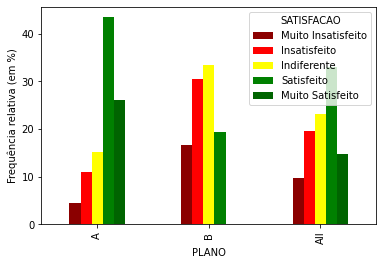

In [69]:
cores = ['darkred','red','yellow','green','darkgreen']

plano_x_satisfacao.plot.bar(color = cores)
plt.ylabel('Frequência relativa (em %)')
#plt.legend(loc='center')
#plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()

Já no gráfico, a seguir, a visualização das frequências relativas dos níveis de satisfação aparecem empilhadas por plano.

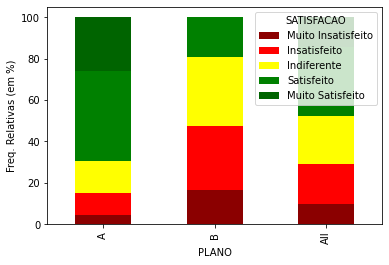

In [70]:
cores = ['darkred','red','yellow','green','darkgreen']
plano_x_satisfacao.plot.bar(color=cores, stacked=True)
plt.ylabel("Freq. Relativas (em %)")
#plt.legend(loc='center')
#plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()

<div id="ex6"></div>

### EXERCÍCIO 6

Faça:
 * Remova o `#` da frente da linha de comando da legenda (`plt.legend`) e veja o quanto isso interfere na melhor visualização do gráfico. 
 * Interprete cada um dos gráficos acima e discuta qual é melhor para ser utilizado. 
 * Seria adequado, em termos exploratórios, construir esses gráficos acima com uma tabela cruzada contendo as frequências absolutas? 

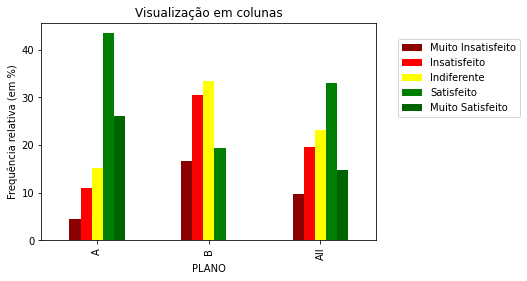

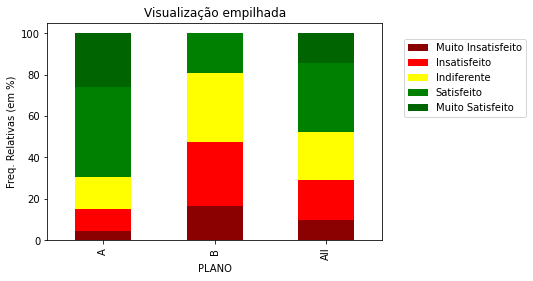

In [71]:
cores = ['darkred','red','yellow','green','darkgreen']

plano_x_satisfacao.plot.bar(color = cores)
plt.title("Visualização em colunas")
plt.ylabel('Frequência relativa (em %)')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()

plano_x_satisfacao.plot.bar(color=cores, stacked=True)
plt.title("Visualização empilhada")
plt.ylabel("Freq. Relativas (em %)")
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()

<div id="ex7"></div>

### EXERCÍCIO 7

Repita os gráficos anteriores para entender o perfil dos clientes em cada plano quanto ao estado civil. Interprete-a em termos do problema.

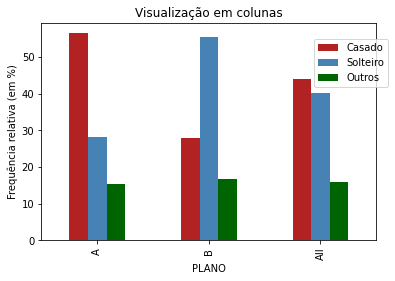

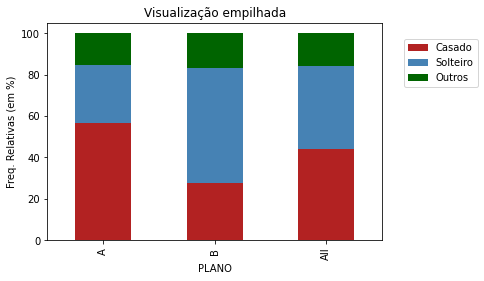

In [76]:
cores = ["firebrick", "steelblue", "darkgreen"]

plano_x_ec.plot.bar(color = cores)
plt.title("Visualização em colunas")
plt.ylabel('Frequência relativa (em %)')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()

plano_x_ec.plot.bar(color=cores, stacked=True)
plt.title("Visualização empilhada")
plt.ylabel("Freq. Relativas (em %)")
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()

[Volta ao Índice](#indice)